<a href="https://colab.research.google.com/github/malikwaqas077/SoccerThroughtheAges/blob/main/Soccer%20Through%20the%20Ages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Soccer Through the Ages

This dataset contains information on international soccer games throughout the years. It includes results of soccer games and information about the players who scored the goals. The dataset contains data from 1872 up to 2023.

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away

These shared columns fully identify the game that was played and can be used to join data between the different CSV files.

Source: [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

### 📊 **Some guiding questions and visualization to help you explore this data:**

1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.
2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.
3. Which 10 players have scored the most hat-tricks?
4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?
5. How many games have been won by the home team? And by the away team?

### 💼 Develop a case study for your portfolio

After exploring the data, you can create a comprehensive case study using this dataset. We have provided an example objective below, but feel free to come up with your own - the world is your oyster!

**Example objective**: The UEFA Euro 2024 tournament is approaching. Utilize the historical data to construct a predictive model that forecasts potential outcomes of the tournament based on the team draws. Since the draws are not known yet, you should be able to configure them as variables in your notebook.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

Alternatively, you can import the data using pandas, for example:

In [17]:
import pandas as pd

results = pd.read_csv("results.csv")

Once you are satisfied with your analysis, you can share your workspace on your portfolio. To do this, click on the "Share" button located in the top right corner and enable the "Add to Portfolio" option.

![Screenshot of the share panel showing how to add to portfolio](share_panel.png)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
results_df=pd.read_csv('results.csv')


In [20]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## **Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.**

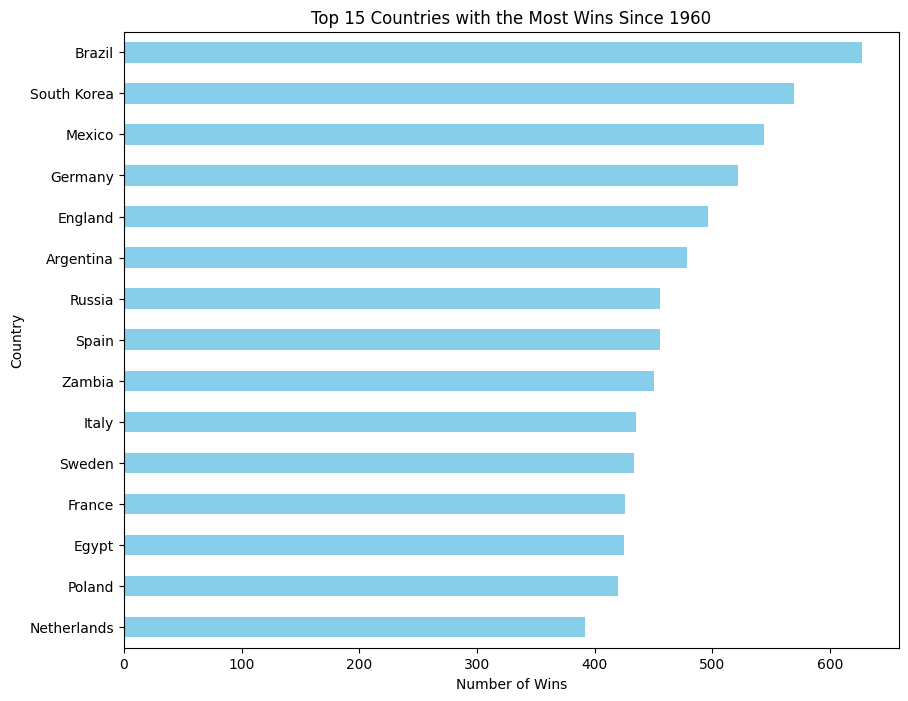

In [21]:
results_df['date'] = pd.to_datetime(results_df['date'])
results_df = results_df[results_df['date'].dt.year >= 1960]

# Calculate the number of wins for each country
results_df['winner'] = results_df.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)
win_counts = results_df['winner'].value_counts()

# Select the top 15 countries
top_15_countries = win_counts.head(15)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
top_15_countries.plot(kind='barh', color='skyblue')
plt.title('Top 15 Countries with the Most Wins Since 1960')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()

## **2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis.**

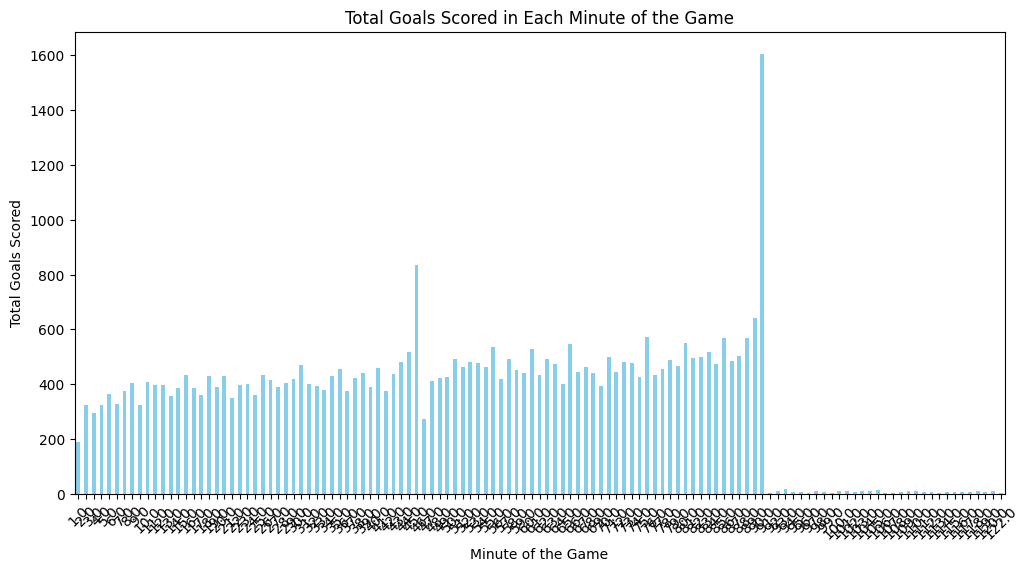

In [22]:
# Load the goalscorers dataset
goalscorers_df = pd.read_csv('goalscorers.csv')

# Group by minute and sum the goals
goals_by_minute = goalscorers_df.groupby('minute')['team'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))
goals_by_minute.plot(kind='bar', color='skyblue')
plt.title('Total Goals Scored in Each Minute of the Game')
plt.xlabel('Minute of the Game')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45)
plt.show()

## **created an animated Plotly plot that shows how the distribution has changed over the years.**

Creating an animated Plotly plot to show how the distribution of goals scored in each minute of the game has changed over the years is a more complex task. By using Plotly Express, with each frame representing a different year, and the data for that year is displayed in the bar plot.

In [23]:

import plotly.express as px

# Load the sample dataset (replace with your dataset)

goalscorers_df = pd.read_csv('goalscorers.csv')

# Extract the year from the 'date' column
goalscorers_df['year'] = pd.to_datetime(goalscorers_df['date']).dt.year

# Group the data by year and minute, counting the goals in each minute
goals_by_year_minute = goalscorers_df.groupby(['year', 'minute'])['team'].count().reset_index()

# Create an animated bar plot using Plotly Express
fig = px.bar(goals_by_year_minute, x='minute', y='team', animation_frame='year',
             title='Total Goals Scored in Each Minute of the Game Over the Years',
             labels={'minute': 'Minute of the Game', 'team': 'Total Goals Scored'})

# Customize the layout
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Minute of the Game', yaxis_title='Total Goals Scored')
fig.update_traces(marker_color='skyblue')

# Show the animated plot
fig.show()


## 3. Which 10 players have scored the most hat-tricks?
To find the 10 players who have scored the most hat-tricks, I have used the data/goalscorers.csv dataset. A hat-trick is when a player scores three goals in a single game. I simply count the number of times each player appears in the dataset with three goals in a single game

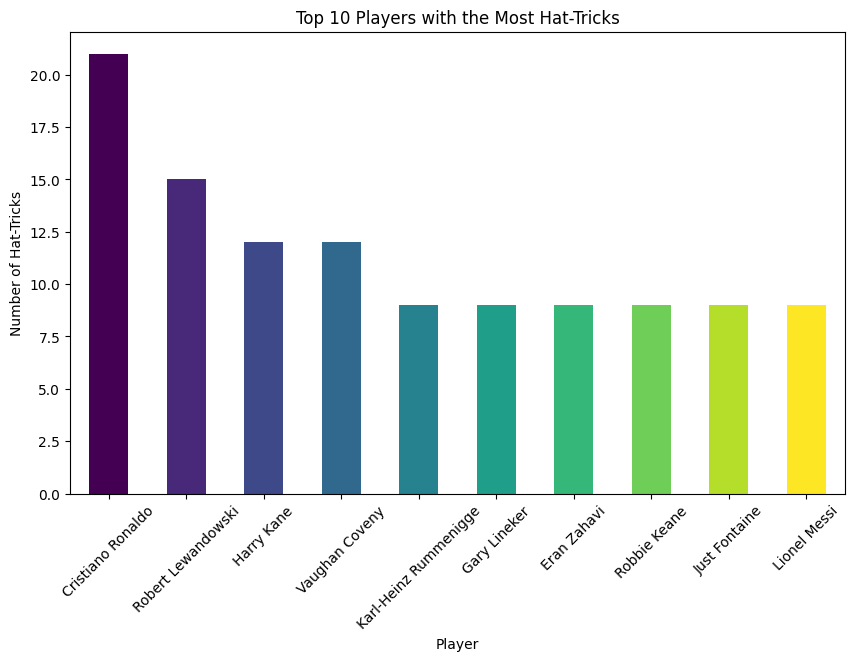

In [24]:
import numpy as np

# Load the goalscorers dataset
goalscorers_df = pd.read_csv('goalscorers.csv')

# Group the dataset by the player and match, then count the goals in each match
goalscorers_df['goals_in_match'] = goalscorers_df.groupby(['scorer', 'date'])['scorer'].transform('count')

# Filter the dataset to include only records where a player scored 3 goals in a single game (hat-tricks)
hat_tricks = goalscorers_df[goalscorers_df['goals_in_match'] == 3]

# Count the number of hat-tricks for each player
hat_trick_counts = hat_tricks['scorer'].value_counts()

# Get the top 10 players with the most hat-tricks
top_10_players_hat_tricks = hat_trick_counts.head(10)

# Create a colorful bar graph
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_players_hat_tricks)))

plt.figure(figsize=(10, 6))
top_10_players_hat_tricks.plot(kind='bar', color=colors)
plt.title('Top 10 Players with the Most Hat-Tricks')
plt.xlabel('Player')
plt.ylabel('Number of Hat-Tricks')
plt.xticks(rotation=45)
plt.show()


## 4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?
I have displayed the team names, home wins, away wins, and the difference in proportions and used custom styles to highlight the difference column with colored bars and adds a caption for clarity.

In [25]:


# Filter the dataset to include only games with a winner (no draws)
results_df = results_df[results_df['home_score'] != results_df['away_score']]

# Calculate the total number of games won by each team at home
home_wins = results_df[results_df['home_score'] > results_df['away_score']]['home_team'].value_counts()

# Calculate the total number of games won by each team away
away_wins = results_df[results_df['away_score'] > results_df['home_score']]['away_team'].value_counts()

# Merge the home and away wins into a single DataFrame
win_counts = pd.concat([home_wins, away_wins], axis=1).fillna(0)
win_counts.columns = ['Home Wins', 'Away Wins']

# Calculate the total number of games played by each team at home and away
total_home_games = results_df['home_team'].value_counts()
total_away_games = results_df['away_team'].value_counts()

# Calculate the proportions of games won by each team at home and away
win_proportions = win_counts.div(total_home_games + total_away_games, axis=0)

# Calculate the difference between the proportions
win_proportions['Difference (Home - Away)'] = win_proportions['Home Wins'] - win_proportions['Away Wins']

# Sort the table by the difference in descending order
win_proportions = win_proportions.sort_values(by='Difference (Home - Away)', ascending=False)

# Display the elegant table with custom styles
styled_table = win_proportions.style.format({
    'Home Wins': '{:.0f}',
    'Away Wins': '{:.0f}',
    'Difference (Home - Away)': '{:.0f}',
}).bar(subset=['Difference (Home - Away)'], align='mid', color=['#5fba7d', '#d65f5f'])

styled_table.set_caption('Proportion of Wins by Team (Home vs. Away)')

# Render the styled table
styled_table


,Home Wins,Away Wins,Difference (Home - Away)
Andalusia,1,0,1
Parishes of Jersey,1,0,1
Catalonia,1,0,1
Brittany,1,0,1
Basque Country,1,0,1
Yorkshire,1,0,0
Menorca,1,0,0
Western Sahara,0,0,0
United Koreans in Japan,0,0,0
Corsica,1,0,0


## 5. How many games have been won by the home team? And by the away team?
For analyzing the number of games won by the home team and by the away team, a simple Donut chart would be suitable.

In [26]:
import plotly.express as px

# Assuming you have already calculated home_wins and away_wins
labels = ['Home Team Wins', 'Away Team Wins']
values = [home_wins, away_wins]

# Create a Plotly pie chart with a hole (donut chart)
fig = px.pie(
    names=labels,
    values=values,
    hole=0.5,  # Set the hole size for the donut effect
    title='Distribution of Wins (Home vs. Away)',
)

# Use the "Viridis" color scale for elegant colors
fig.update_traces(marker=dict(colors=px.colors.sequential.Viridis))

# Display the interactive donut chart
fig.show()
